This script converts the ionization data generated by SRIM given by the file `ionization.txt` and converts it to a C array with 100 entries ranging from y=0 to y=25.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

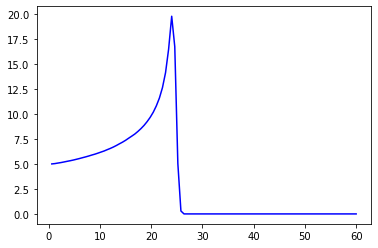

In [3]:
# Import Data

with open('ionization.txt') as f:
    lines = f.readlines()

    x = np.array([float(line.split()[0])*0.0001 for line in lines])
    q = np.array([float(line.split()[1]) for line in lines])

# Helper functions
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
def to_c_array(values, ctype="float", name="table", formatter=str, colcount=8):
    # apply formatting to each element
    values = [formatter(v) for v in values]

    # split into rows with up to `colcount` elements per row
    rows = [values[i:i+colcount] for i in range(0, len(values), colcount)]

    # separate elements with commas, separate rows with newlines
    body = ',\n    '.join([', '.join(r) for r in rows])

    # assemble components into the complete string
    return '{} {}[] = {{\n    {}}};'.format(ctype, name, body)

plt.plot(x, q, 'b-', label='data')

In [4]:
x_actual = np.linspace(0, 25, 100)
q_actual = np.zeros(100)
for i in range(100):
    j = find_nearest(x, x_actual[i])
    q_actual[i] = int(q[j])

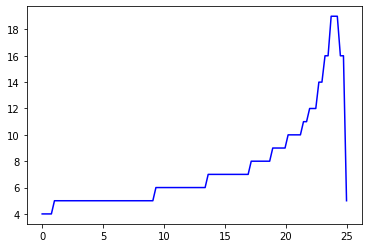

In [5]:
plt.plot(x_actual, q_actual, 'b-', label='data')

In [6]:
print(to_c_array(q_actual))

float table[] = {
    4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0,
    5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,
    5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,
    5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,
    5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0,
    6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0,
    6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0,
    7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0,
    7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0,
    8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0,
    10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 12.0,
    12.0, 12.0, 14.0, 14.0, 16.0, 16.0, 19.0, 19.0,
    19.0, 16.0, 16.0, 5.0};


In [7]:
sum(q_actual)

744.0